<a href="https://colab.research.google.com/github/geoUFSC/learning/blob/main/VariogramExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example

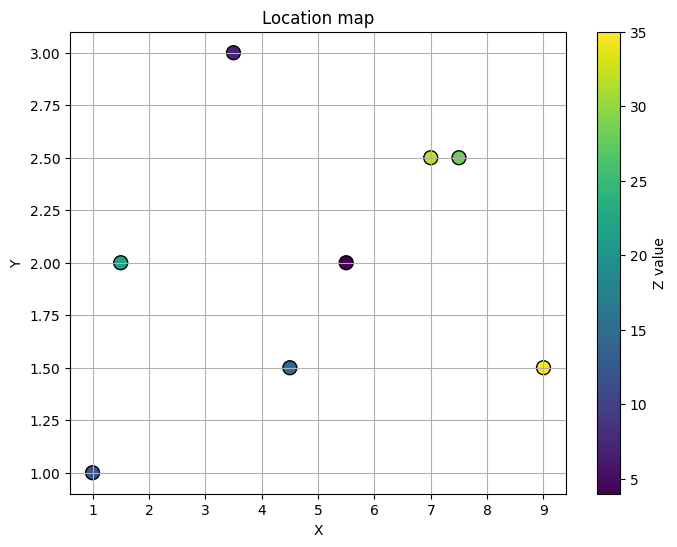

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the table
X = [1, 1.5, 3.5, 4.5, 5.5, 7, 7.5, 9]
Y = [1, 2, 3, 1.5, 2, 2.5, 2.5, 1.5]
Z = [12, 22, 7, 15, 4, 32, 28, 35]

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, c=Z, s=100, cmap='viridis', edgecolor='black')

# Adding color bar to represent Teor values
cbar = plt.colorbar()
cbar.set_label('Z value')

# Labeling the plot
plt.title('Location map')
plt.xlabel('X')
plt.ylabel('Y')

# Display the plot
plt.grid(True)
plt.show()

Summary statistics of Z
Mean: 19.375
Median: 18.5
Variance: 118.484375
Standard deviation: 10.885052824860336
Minimum: 4
Maximum: 35
Range: 31
25th percentile: 10.75
75th percentile: 29.0
Interquartile range: 18.25


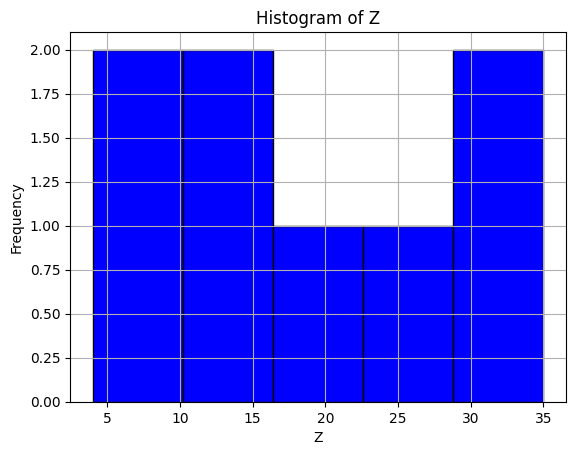

In [2]:
#summary statistics table of Z
print('Summary statistics of Z')
print('Mean:', np.mean(Z))
print('Median:', np.median(Z))
print('Variance:', np.var(Z))
print('Standard deviation:', np.std(Z))
print('Minimum:', np.min(Z))
print('Maximum:', np.max(Z))
print('Range:', np.max(Z) - np.min(Z))
print('25th percentile:', np.percentile(Z, 25))
print('75th percentile:', np.percentile(Z, 75))
print('Interquartile range:', np.percentile(Z, 75) - np.percentile(Z, 25))




#histogram of Z
plt.hist(Z, bins=5, color='blue', edgecolor='black')
plt.title('Histogram of Z')
plt.xlabel('Z')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3]:
#calculate the distance between all pairs of points
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Calculate the distance between all pairs of points
n = len(X)
distance = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        distance[i, j] = calculate_distance(X[i], Y[i], X[j], Y[j])

# Print the distance matrix
#print(distance)

#make a table identidying the pairs of points and their distances
# Create a table with the distances between all pairs of points
table = np.zeros((n**2, 3))
for i in range(n):
    for j in range(n):
        table[i*n + j, 0] = i
        table[i*n + j, 1] = j
        table[i*n + j, 2] = distance[i, j]

#remove repeated pairs eg. (0, 1) and (1, 0)
table = table[table[:, 0] < table[:, 1]]


# Print the table
print(table)


[[0.         1.         1.11803399]
 [0.         2.         3.20156212]
 [0.         3.         3.53553391]
 [0.         4.         4.60977223]
 [0.         5.         6.18465844]
 [0.         6.         6.67083203]
 [0.         7.         8.01560977]
 [1.         2.         2.23606798]
 [1.         3.         3.04138127]
 [1.         4.         4.        ]
 [1.         5.         5.52268051]
 [1.         6.         6.02079729]
 [1.         7.         7.51664819]
 [2.         3.         1.80277564]
 [2.         4.         2.23606798]
 [2.         5.         3.53553391]
 [2.         6.         4.03112887]
 [2.         7.         5.70087713]
 [3.         4.         1.11803399]
 [3.         5.         2.6925824 ]
 [3.         6.         3.16227766]
 [3.         7.         4.5       ]
 [4.         5.         1.58113883]
 [4.         6.         2.06155281]
 [4.         7.         3.53553391]
 [5.         6.         0.5       ]
 [5.         7.         2.23606798]
 [6.         7.         1.80

In [4]:
#for each distance, calculate the semivariance as 0.5 * (Z[i] - Z[j])**2
# Create a table with the semivariance between all pairs of points
semivariance = np.zeros((n**2, 3))
for i in range(n):
    for j in range(n):
        semivariance[i*n + j, 0] = i
        semivariance[i*n + j, 1] = j
        semivariance[i*n + j, 2] = 0.5 * (Z[i] - Z[j])**2

#remove repeated pairs eg. (0, 1) and (1, 0)
semivariance = semivariance[semivariance[:, 0] < semivariance[:, 1]]

#associate the semivariance with the distance
# Combine the distance and semivariance tables
semivariance = np.hstack((table, semivariance[:, 2].reshape(-1, 1)))

# Print the table
print(semivariance)


[[  0.           1.           1.11803399  50.        ]
 [  0.           2.           3.20156212  12.5       ]
 [  0.           3.           3.53553391   4.5       ]
 [  0.           4.           4.60977223  32.        ]
 [  0.           5.           6.18465844 200.        ]
 [  0.           6.           6.67083203 128.        ]
 [  0.           7.           8.01560977 264.5       ]
 [  1.           2.           2.23606798 112.5       ]
 [  1.           3.           3.04138127  24.5       ]
 [  1.           4.           4.         162.        ]
 [  1.           5.           5.52268051  50.        ]
 [  1.           6.           6.02079729  18.        ]
 [  1.           7.           7.51664819  84.5       ]
 [  2.           3.           1.80277564  32.        ]
 [  2.           4.           2.23606798   4.5       ]
 [  2.           5.           3.53553391 312.5       ]
 [  2.           6.           4.03112887 220.5       ]
 [  2.           7.           5.70087713 392.        ]
 [  3.    

In [5]:
import pandas as pd

# Create data with the third and fourth columns of semivariance table
data = semivariance[:, 2:]

#data = [     [50, 1.11803399], [12.5, 3.20156212], [4.5, 3.53553391], [32, 4.60977223], [200, 6.18465844],
 #   [128, 6.67083203], [264.5, 8.01560977], [112.5, 2.23606798], [24.5, 3.04138127],
 #   [162, 4.0], [50, 5.52268051], [18, 6.02079729], [84.5, 7.51664819], [32, 1.80277564], [4.5, 2.23606798], [312.5, 3.53553391], [220.5, 4.03112887], [392, 5.70087713],
 #   [60.5, 1.11803399], [144.5, 2.6925824], [84.5, 3.16227766], [200, 4.5], [392, 1.58113883], [288, 2.06155281], [480.5, 3.53553391],
 #   [8, 0.5], [4.5, 2.23606798], [24.5, 1.80277564] ]

# Creating DataFrame with the columns
df = pd.DataFrame(data, columns=['h', 'γ(h)'])

# Renaming the columns for proper display
df.index = [f"γ({round(h, 1)})" for h in df['h']]
df.drop(columns=['h'], inplace=True)


# Display the table
df.head(30)

,γ(h)
γ(1.1),50.0
γ(3.2),12.5
γ(3.5),4.5
γ(4.6),32.0
γ(6.2),200.0
γ(6.7),128.0
γ(8.0),264.5
γ(2.2),112.5
γ(3.0),24.5
γ(4.0),162.0


In [6]:
# Create data with the third and fourth columns of semivariance table
data = semivariance[:, 2:]

# Creating DataFrame with 2 columns
df = pd.DataFrame(data, columns=['h', 'γ(h)'])
#round the values to 1 decimal place
df['h'] = np.round(df['h'], 1)
df['γ(h)'] = np.round(df['γ(h)'], 1)



# Display the table
df.head(50)





,h,γ(h)
0,1.1,50.0
1,3.2,12.5
2,3.5,4.5
3,4.6,32.0
4,6.2,200.0
5,6.7,128.0
6,8.0,264.5
7,2.2,112.5
8,3.0,24.5
9,4.0,162.0


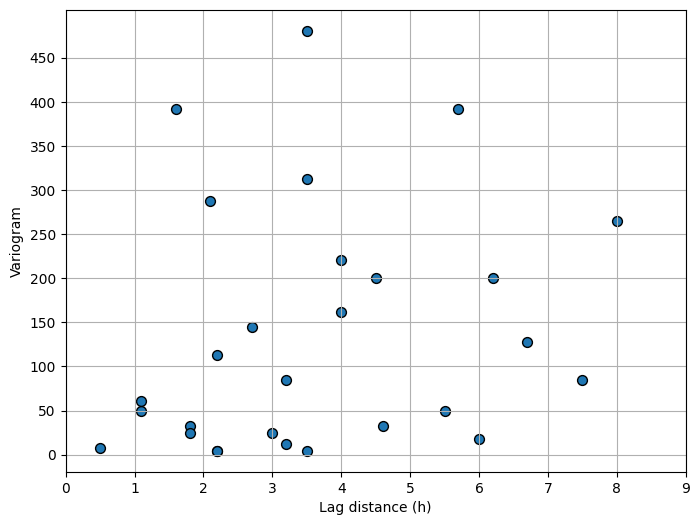

In [7]:
#make a scatter plot of the data. The second column (variogram) is in the y axis and the first in the x axis (lag (h)))
# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(df['h'], df['γ(h)'], s=50, edgecolor='black')
plt.yticks(np.arange(0, 500, 50))
plt.xticks(np.arange(0, 10, 1))

# Labeling the plot

plt.xlabel('Lag distance (h)')
plt.ylabel('Variogram')
plt.grid(True)
plt.show()







In [8]:
#calculate the average of the variogram values and distances for the data with lag distance between 0-1, 1-3, 3-5, 5-7, 7-9

# Create a list to store the averages
average = []

# Create a list with the limits of the lag distance
limits = [0, 1, 3, 5, 7, 9]

# Calculate the average of the variogram values and distances
for i in range(len(limits) - 1):
    mask = (df['h'] >= limits[i]) & (df['h'] < limits[i + 1])
    average.append([np.mean(df['h'][mask]), np.mean(df['γ(h)'][mask])])

# Create a DataFrame with the averages
average = pd.DataFrame(average, columns=['h', 'γ(h)'])

# Include a column with the values of the limits
average['Limits'] = [f"{limits[i]}-{limits[i + 1]}" for i in range(len(limits) - 1)]


# Display the table
average.head(50)





,h,γ(h),Limits
0,0.50,8.00,0-1
1,1.88,111.30,1-3
2,3.70,153.35,3-5
3,6.02,157.60,5-7
4,7.75,174.50,7-9


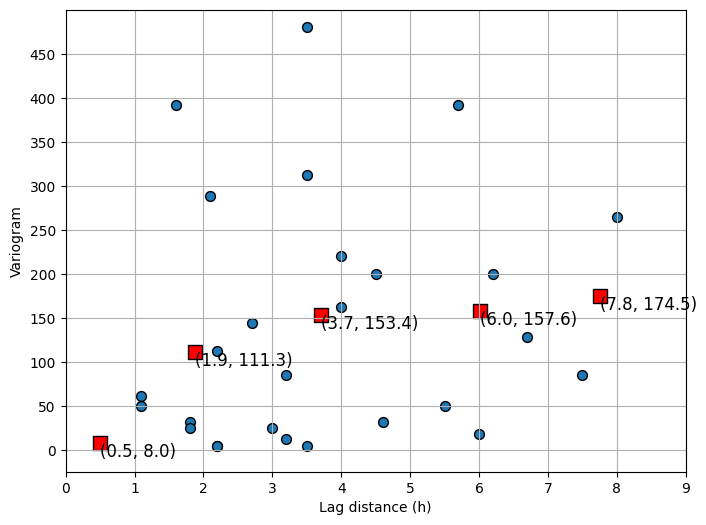

In [9]:
#include squares of these averages of values in the previous plot
# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(df['h'], df['γ(h)'], s=50, edgecolor='black')
plt.yticks(np.arange(0, 500, 50))
plt.xticks(np.arange(0, 10, 1))

# Plotting the average values scatterplot
plt.scatter(average['h'], average['γ(h)'], c='red', s=100, edgecolor='black', marker='s')
#text on the upper left of the point (h, γ(h)) round to 1 decimal place
for i in range(len(average)):
    plt.text(average['h'][i], average['γ(h)'][i], f"({round(average['h'][i], 1)}, {round(average['γ(h)'][i], 1)})", fontsize=12, ha='left', va='top')

# Labeling the plot
plt.xlabel('Lag distance (h)')
plt.ylabel('Variogram')
plt.xlim(0, 9)
plt.ylim(-25, 500)


plt.grid(True)
plt.show()



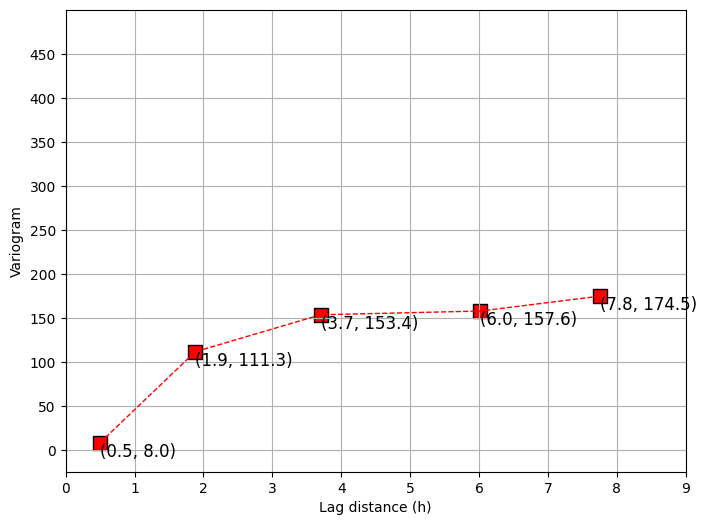

In [10]:
#plot the average values of the variogram against the lag distance keeping the axis interval and connect the points with a line
# Plotting the data

plt.figure(figsize=(8, 6))
plt.plot(average['h'], average['γ(h)'], color='red', linestyle='--', linewidth=1)

plt.scatter(average['h'], average['γ(h)'], c='red', s=100, edgecolor='black', marker='s')
for i in range(len(average)):
    plt.text(average['h'][i], average['γ(h)'][i], f"({round(average['h'][i], 1)}, {round(average['γ(h)'][i], 1)})", fontsize=12, ha='left', va='top')

plt.xlim(0, 9)
plt.yticks(np.arange(0, 500, 50))
plt.ylim(-25, 500)
# Labeling the plot
plt.xlabel('Lag distance (h)')
plt.ylabel('Variogram')
plt.grid(True)
plt.show()

